In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/MrKundann/Datasets/main/avocado.csv", parse_dates=['Date'])
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape 

(18249, 14)

#### we have 18249 rows and 14 columns Avg price is our target column

In problem statement, we have to predict avg Price which is our target .. this is a regression problem

In [4]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


#### All features have float datatype except region and type which are object data type.

year has a float data type we can convert it into int for model building.

In [6]:
# checking Null Values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### No null values

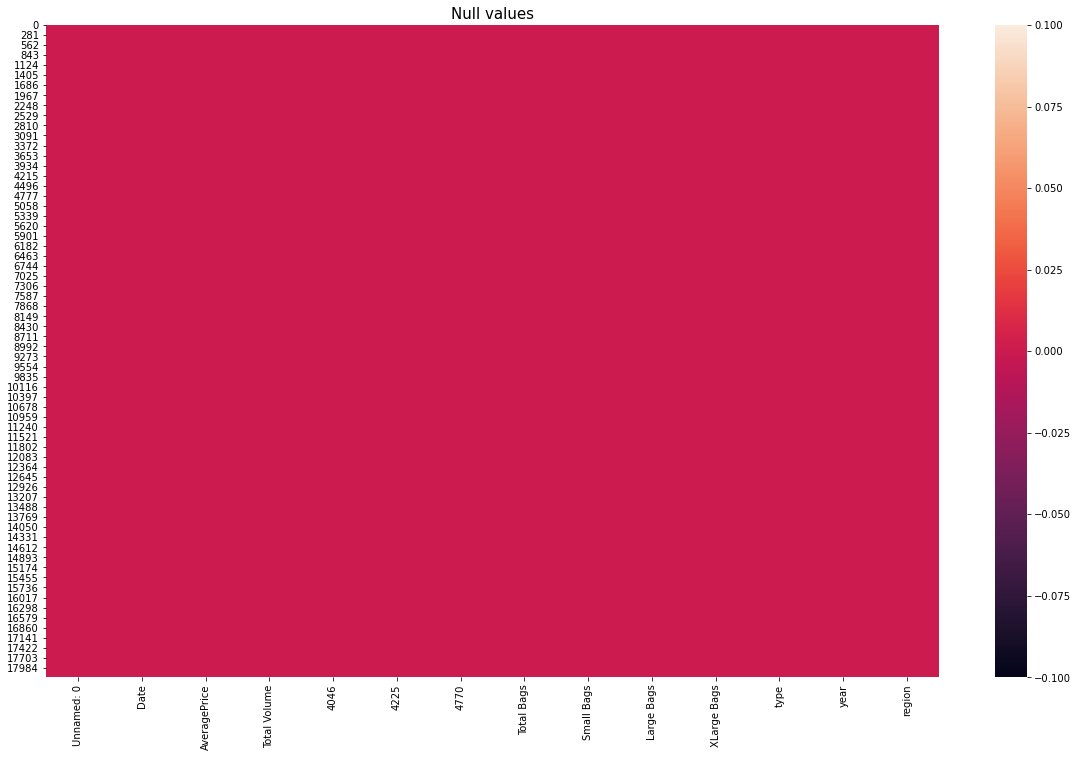

In [7]:
# ploting heatmap for double checking null values

plt.figure(figsize=(20,12))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

## Statistical summary: 

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Gap between 3rd quantile and Max values is very high in 4046,4225,Total bags and other skewed columns so it clearly indicates that outliers are present in out data

In [9]:
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

In [10]:
# dropping the unnecessary col
df = df.drop(['Unnamed: 0','Date','year'],axis=1)# I have dropped the columns Unnamed: 0 because it is just a counting number which has no significance in prediction

# I have droppend date column because we have extracted the Day, Month, Year seperatly from Date column.

# I have dropped year column because we get same columns Year y feature Extraction from our Date Column.

## EDA 

## Correlation: 

In [11]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

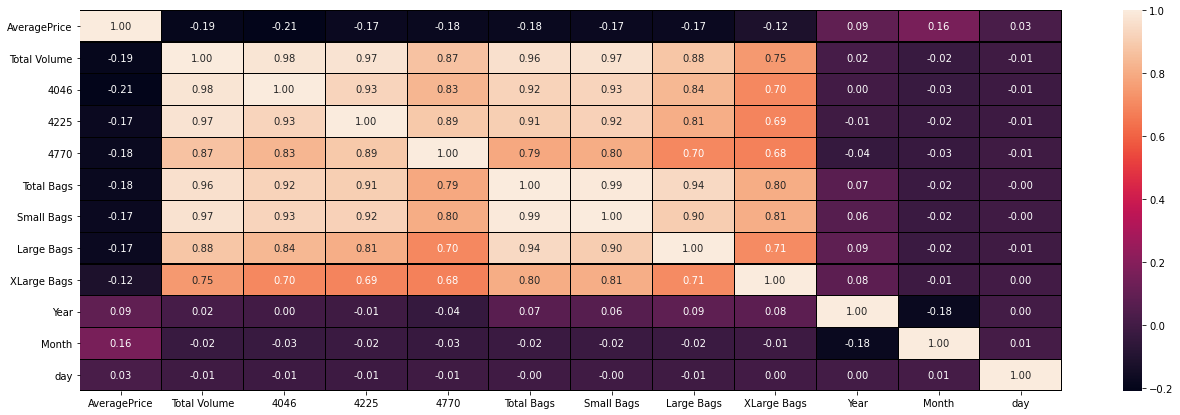

In [12]:
#Heatmap using df.corr

plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

<AxesSubplot:>

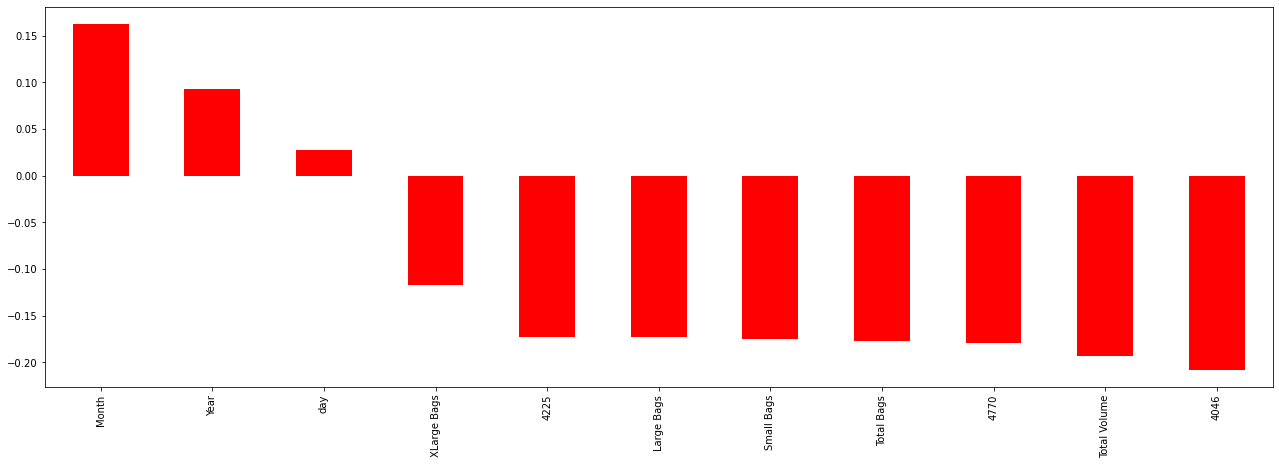

In [13]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='r')

#### We can see that only few features Feature positivly correlated with our Target Attribute AveragePrice.

#### But the correlation is not very strong enough.

#### Mostly features are negativly correlated with our Target attribute.

## Categorical Columns

In [14]:
df['type'].unique()


array(['conventional', 'organic'], dtype=object)

In [15]:
df['region'].value_counts()

SouthCarolina          338
SanFrancisco           338
Boise                  338
Syracuse               338
CincinnatiDayton       338
HartfordSpringfield    338
NewYork                338
LosAngeles             338
Atlanta                338
SanDiego               338
NorthernNewEngland     338
Sacramento             338
Charlotte              338
RaleighGreensboro      338
PhoenixTucson          338
Roanoke                338
Plains                 338
Tampa                  338
West                   338
TotalUS                338
California             338
Louisville             338
Midsouth               338
Albany                 338
Houston                338
Chicago                338
Columbus               338
BuffaloRochester       338
HarrisburgScranton     338
Boston                 338
LasVegas               338
Detroit                338
Seattle                338
MiamiFtLauderdale      338
Orlando                338
DallasFtWorth          338
GrandRapids            338
S

## Data Visualization

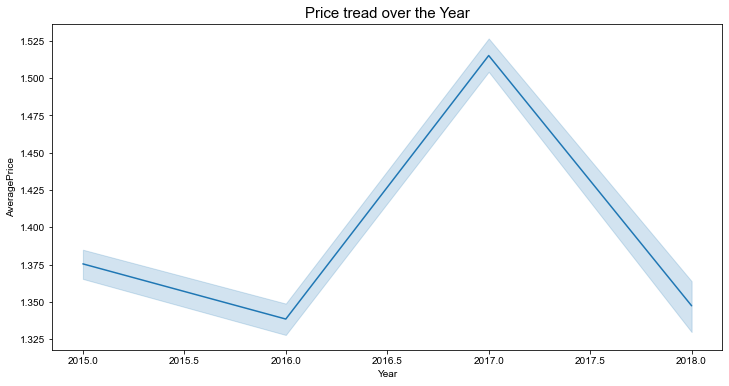

In [16]:
plt.figure(figsize=(12,6))
plt.title('Price tread over the Year',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df['Year'],df['AveragePrice'],data=df);

#### There is a clear sign that prices of Avacado rises from 2016 to 2017.

## Plotting all possible graphs by pairplot

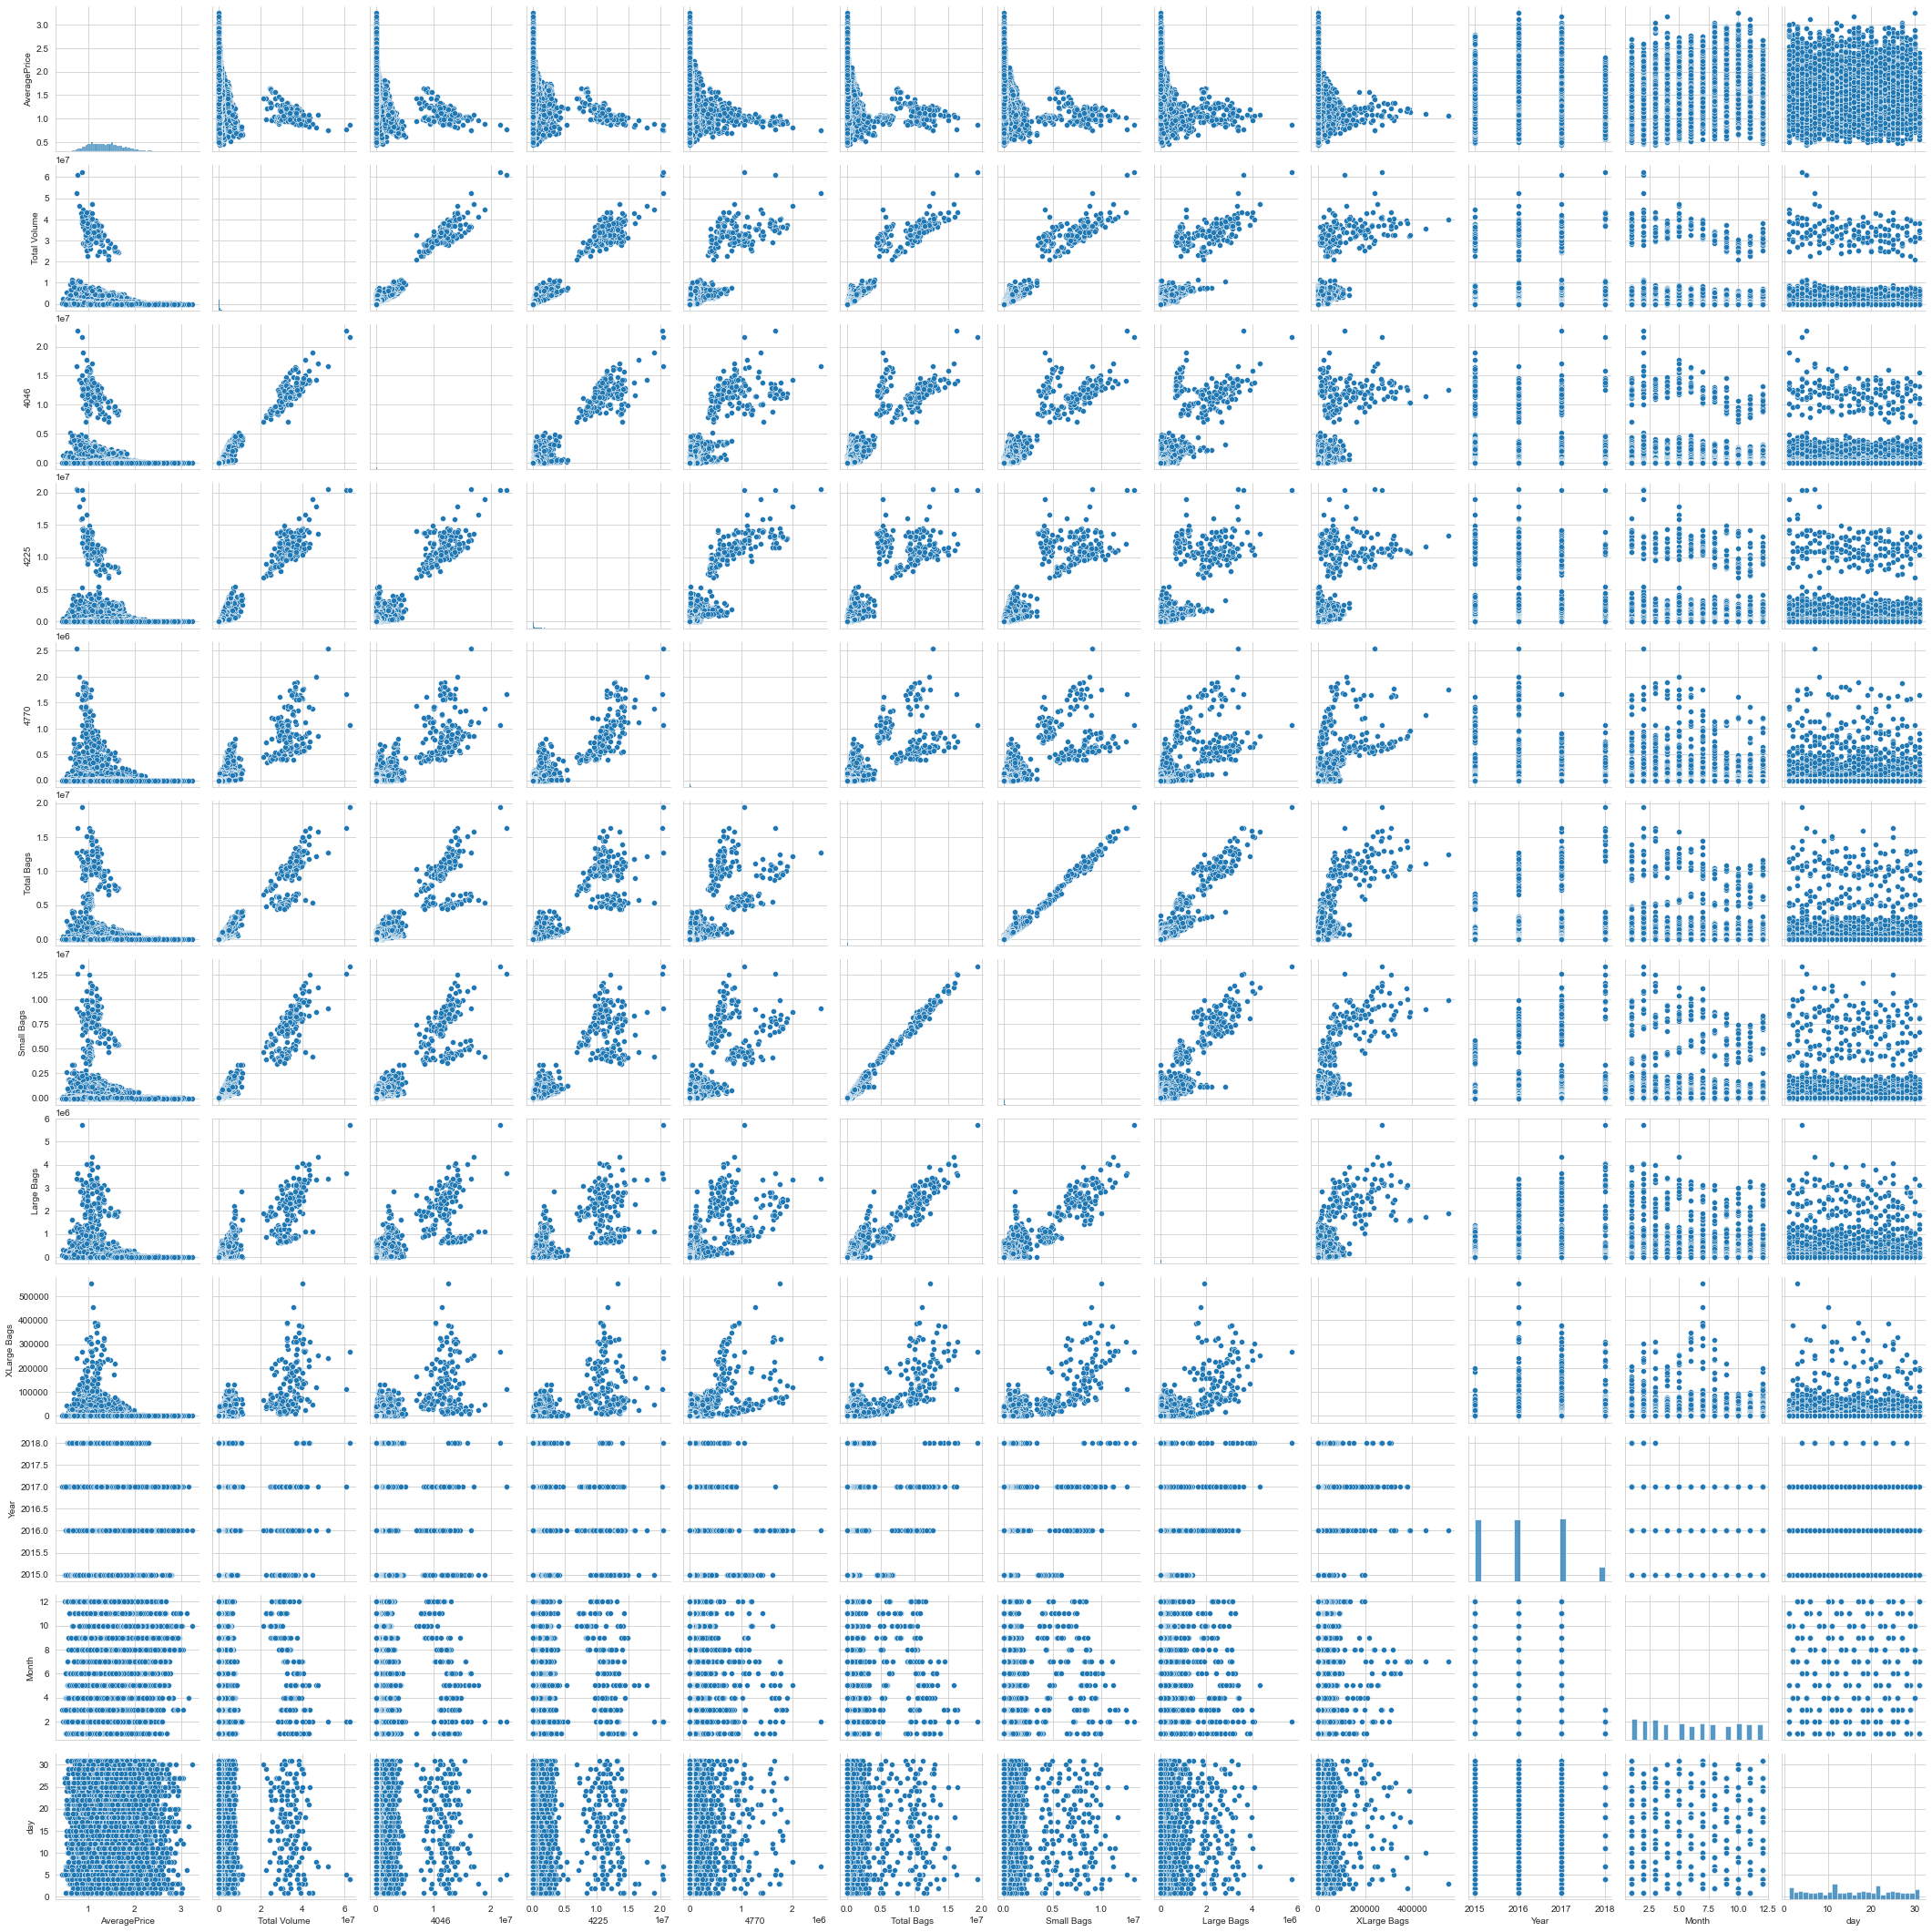

In [17]:
sns.pairplot(df)

#### These fields are : 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'.

##### These fields are some what showing positive or neutral correlation with each other.

## Data Distribution

In [18]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'day'],
      dtype='object')

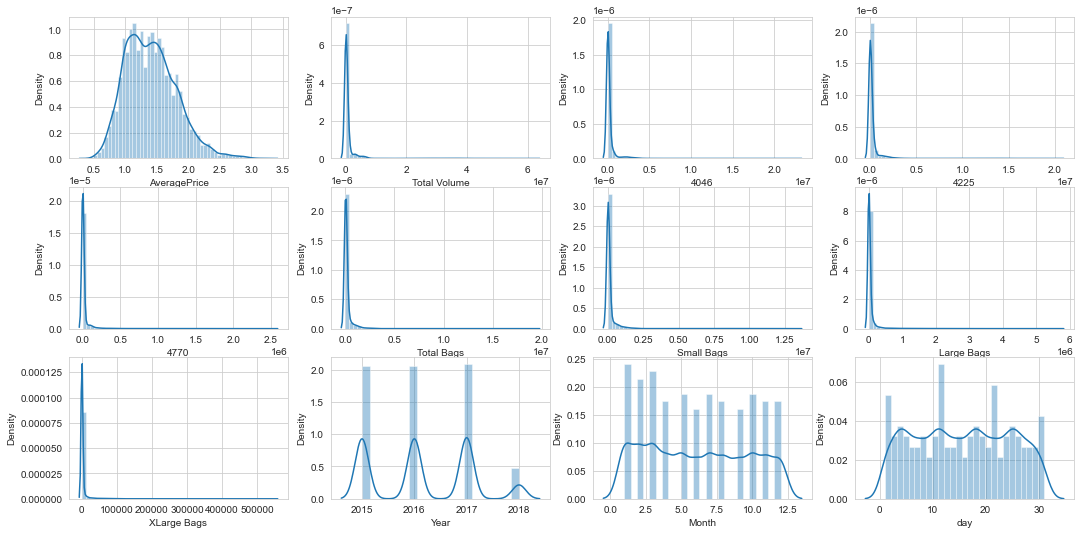

In [19]:
dist=df.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();  

#### We can see that maximum data is normally distributed

In [20]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
Month            0.106617
day              0.014310
dtype: float64

## Checking Outliers 

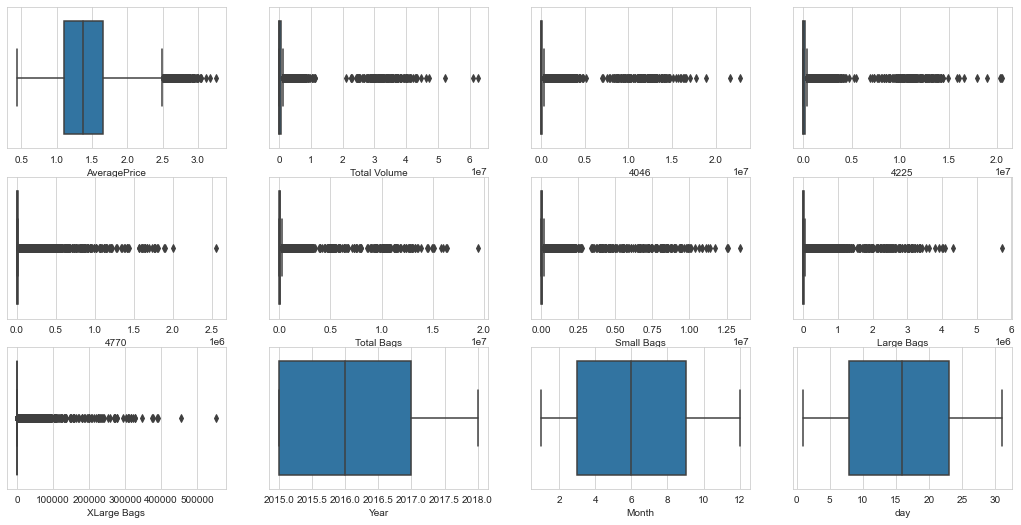

In [21]:
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();

#### we can see there is a outliers presnt. We can remove the outliers using IQR or Zscore method.

In [22]:
df.shape

(18249, 14)

## Outliers Removal

In [23]:
## Checking outliers: 

def IQR_outliers(df):

     Q1=df.quantile(0.25)
     Q3=df.quantile(0.75)
     IQR=Q3-Q1
     df=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
     return df

In [24]:
IQR_outliers(df['AveragePrice'])

11314    2.58
11320    2.79
11321    2.66
11322    2.59
11323    2.74
         ... 
17433    2.56
17434    2.61
17514    2.52
17515    2.51
17568    2.50
Name: AveragePrice, Length: 209, dtype: float64

In [25]:
index = np.where(IQR_outliers(df['AveragePrice']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(18040, 14)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,209,1.07,489802.88,4912.37,390100.99,5887.72,88901.80,88768.47,133.33,0.0,conventional,Boston,2015,12,20
1,210,1.01,549945.76,4641.02,455362.38,219.40,89722.96,89523.38,199.58,0.0,conventional,Boston,2015,12,13
2,211,1.02,488679.31,5126.32,407520.22,142.99,75889.78,75666.22,223.56,0.0,conventional,Boston,2015,12,6
3,212,1.19,350559.81,3609.25,272719.08,105.86,74125.62,73864.52,261.10,0.0,conventional,Boston,2015,11,29
4,213,1.07,466759.99,4457.62,383420.46,233.74,78648.17,78161.82,486.35,0.0,conventional,Boston,2015,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18036,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18037,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18038,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [26]:
IQR_outliers(df['4225'])

209      390100.99
210      455362.38
211      407520.22
213      383420.46
214      420936.80
           ...    
17954    425616.86
18214    444949.69
18215    408763.50
18216    390129.50
18218    680037.45
Name: 4225, Length: 2469, dtype: float64

In [27]:
index = np.where(IQR_outliers(df['4225']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(15571, 14)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,2678,1.06,32408705.70,13299568.71,11505999.24,1045832.54,6557305.21,5690216.31,846752.40,20336.50,conventional,TotalUS,2015,6,28
1,2679,1.02,35734613.90,14699604.93,13244466.60,1326422.56,6464119.81,5517909.51,898027.46,48182.84,conventional,TotalUS,2015,6,21
2,2680,0.98,37026085.75,16383685.07,12821015.03,1085081.61,6736304.04,5893641.72,822399.78,20262.54,conventional,TotalUS,2015,6,14
3,2681,1.00,36549995.66,16529797.60,12582265.21,1144715.95,6293216.90,5304562.91,943995.95,44658.04,conventional,TotalUS,2015,6,7
4,2682,1.03,33720159.09,15503613.33,11599634.02,903908.35,5713003.39,4967231.63,726046.25,19725.51,conventional,TotalUS,2015,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15566,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,WestTexNewMexico,2018,2,4
15567,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,WestTexNewMexico,2018,1,28
15568,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,WestTexNewMexico,2018,1,21
15569,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,WestTexNewMexico,2018,1,14


In [28]:
IQR_outliers(df['Total Bags'])

2678     6557305.21
2679     6464119.81
2680     6736304.04
2681     6293216.90
2682     5713003.39
            ...    
18220     977084.84
18221     936859.49
18222     914409.26
18223    1005593.78
18224    1089861.24
Name: Total Bags, Length: 2094, dtype: float64

In [29]:
index = np.where(IQR_outliers(df['Total Bags']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(13477, 14)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,4772,1.13,288866.22,57433.83,140113.93,17215.48,74102.98,73376.76,726.22,0.0,conventional,RaleighGreensboro,2016,3,20
1,4773,1.08,303779.53,65417.48,142777.21,20693.96,74890.88,73420.12,1470.76,0.0,conventional,RaleighGreensboro,2016,3,13
2,4774,1.08,298087.71,66431.92,140242.50,22198.37,69214.92,68588.92,626.00,0.0,conventional,RaleighGreensboro,2016,3,6
3,4775,1.08,281060.42,59637.15,136706.15,19136.17,65580.95,63934.42,1646.53,0.0,conventional,RaleighGreensboro,2016,2,28
4,4776,1.05,263148.45,55054.39,118359.43,19436.13,70298.50,69867.25,431.25,0.0,conventional,RaleighGreensboro,2016,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13472,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
13473,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
13474,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
13475,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [30]:
IQR_outliers(df['Small Bags'])

4952     159927.44
4953     182692.61
4955     161784.53
4956     177175.95
4957     204056.33
           ...    
18220    774695.74
18221    796104.27
18222    710654.40
18223    858772.69
18224    915452.78
Name: Small Bags, Length: 1589, dtype: float64

In [31]:
index = np.where(IQR_outliers(df['Small Bags']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(11888, 14)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,6361,1.61,107018.62,2211.54,52467.15,17501.90,34838.03,25029.12,5916.44,3892.47,conventional,GrandRapids,2017,12,10
1,6362,0.99,301527.00,2268.00,182507.00,65476.00,51277.00,14813.00,26632.00,9831.00,conventional,GrandRapids,2017,12,3
2,6363,1.65,96700.00,1864.00,50330.00,11404.00,33102.00,22505.00,10417.00,180.00,conventional,GrandRapids,2017,11,26
3,6364,1.40,139279.00,2688.00,68242.00,15683.00,52667.00,42924.00,7407.00,2335.00,conventional,GrandRapids,2017,11,19
4,6365,1.59,110784.00,2585.00,49202.00,17062.00,41935.00,31462.00,8517.00,1957.00,conventional,GrandRapids,2017,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11883,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,WestTexNewMexico,2018,2,4
11884,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,WestTexNewMexico,2018,1,28
11885,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,WestTexNewMexico,2018,1,21
11886,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,WestTexNewMexico,2018,1,14


In [32]:
IQR_outliers(df['XLarge Bags'])

6361     3892.47
6362     9831.00
6363      180.00
6364     2335.00
6365     1957.00
          ...   
18232     510.41
18233     102.38
18234     228.27
18235      12.12
18236      24.18
Name: XLarge Bags, Length: 2336, dtype: float64

In [33]:
index = np.where(IQR_outliers(df['XLarge Bags']))
df = df.drop(df.index[index])
print(df.shape)
df.reset_index()

(9552, 14)


,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,8697,0.71,1501699.41,701418.48,176206.50,3827.34,620247.09,528247.89,91441.42,557.78,conventional,Houston,2018,3,4
1,8698,0.67,1657524.28,855570.87,147837.21,3976.08,650140.12,544537.00,105365.34,237.78,conventional,Houston,2018,2,25
2,8699,0.68,1572064.61,931553.80,160780.41,4045.42,475684.98,372117.42,103276.45,291.11,conventional,Houston,2018,2,18
3,8700,0.58,1870874.72,801390.67,156458.96,4407.32,908617.77,747968.17,160355.16,294.44,conventional,Houston,2018,2,11
4,8701,0.56,2381742.59,952746.89,300383.28,7990.32,1120622.10,1010539.42,109978.24,104.44,conventional,Houston,2018,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,WestTexNewMexico,2018,2,4
9548,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,WestTexNewMexico,2018,1,28
9549,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,WestTexNewMexico,2018,1,21
9550,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,WestTexNewMexico,2018,1,14


In [34]:
## Percentage Dataloss: 
loss_percent = (18249-17817)/18249*100
loss_percent

2.3672530001643923

#### Data loss is in the acceptable range , good to proceed.

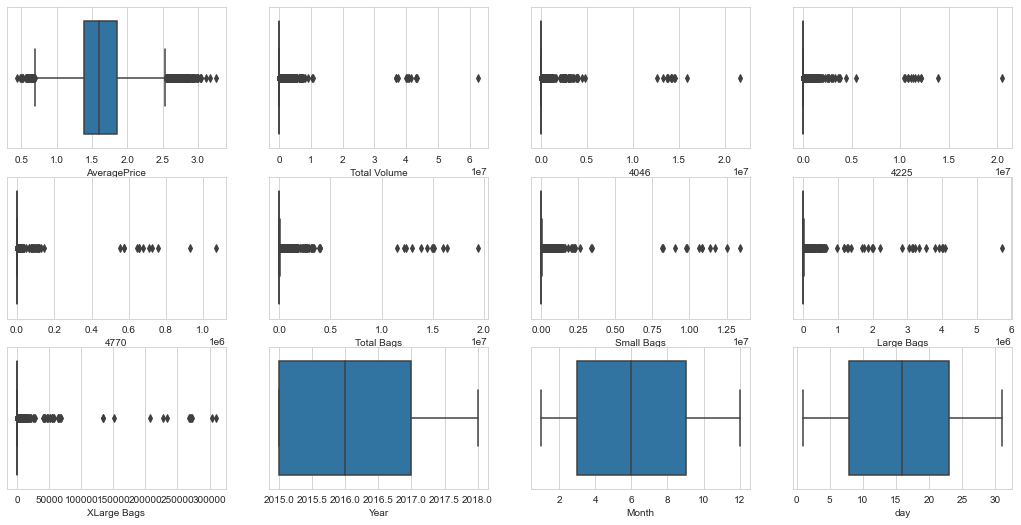

In [35]:
plt.figure(figsize=(18,12))
plot=1
for col in dist:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();


#### removed outliers using IQR method

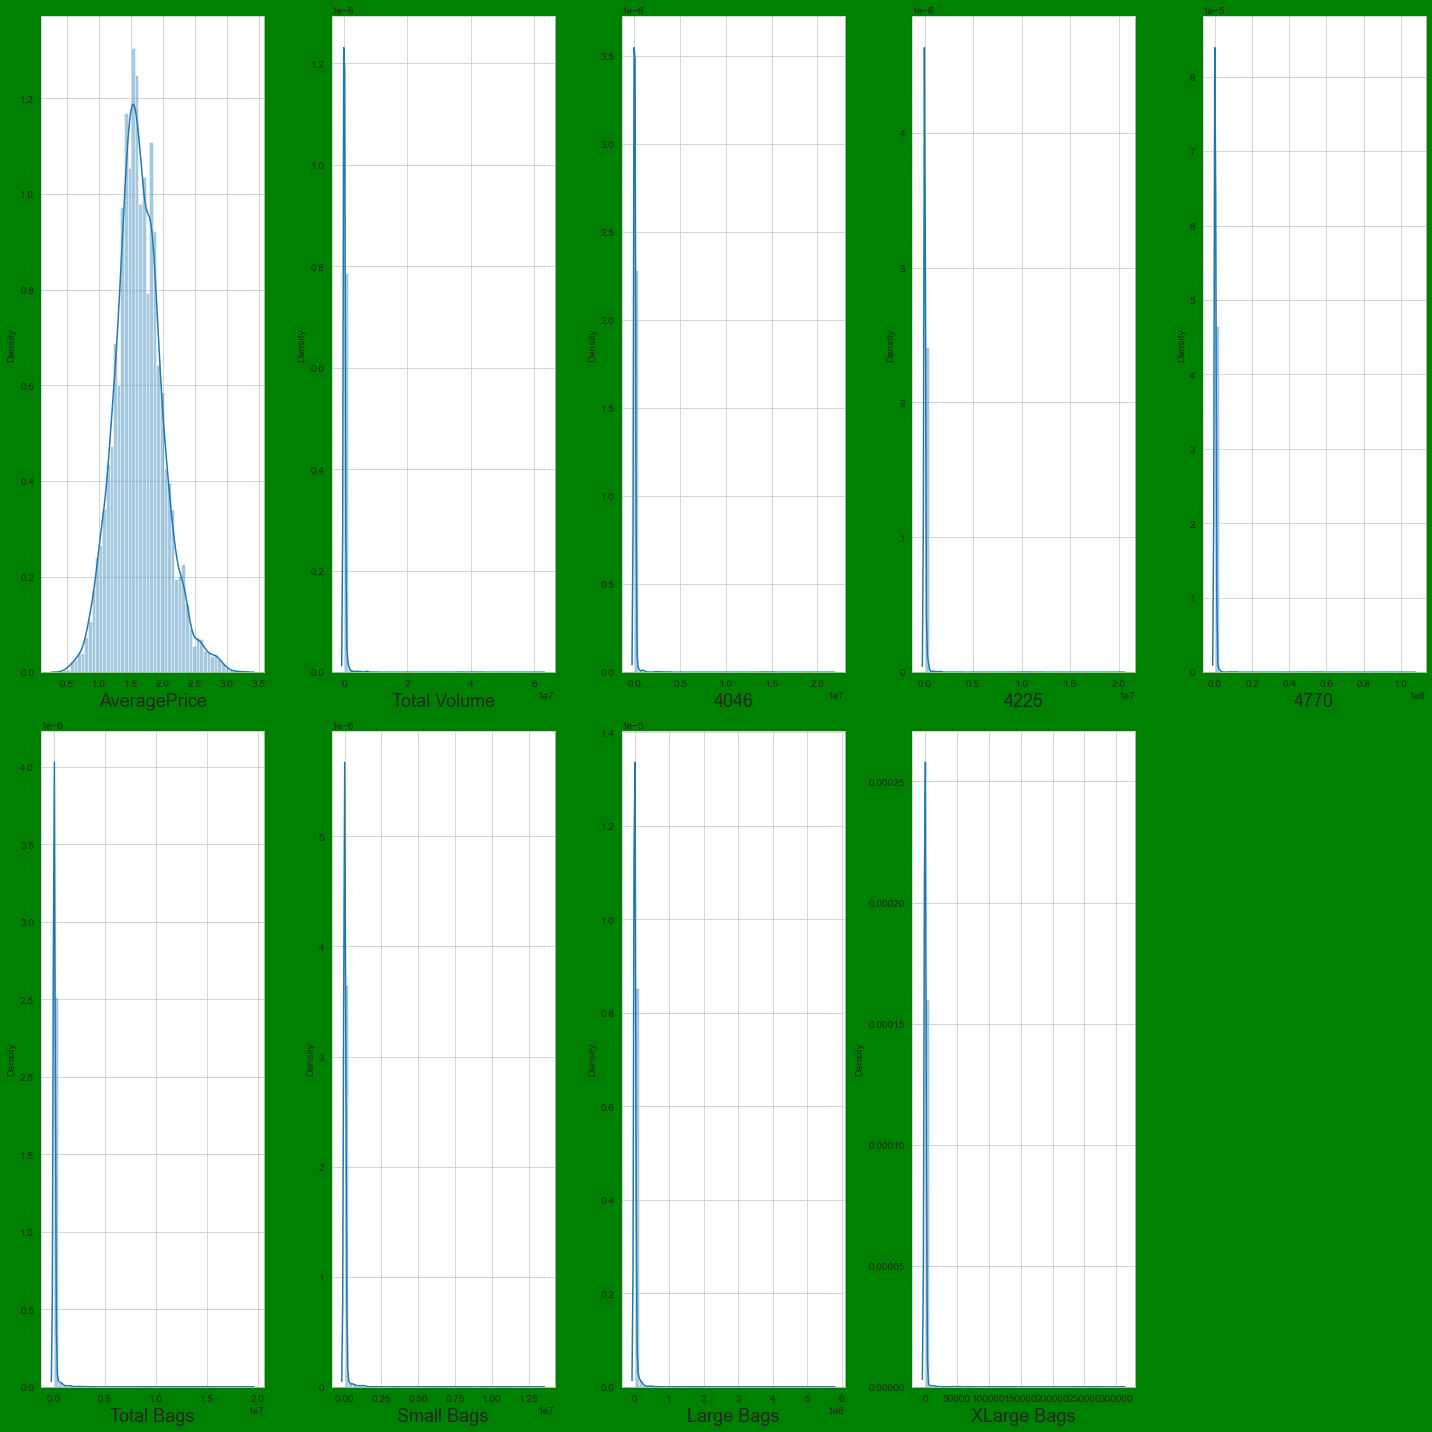

In [36]:
## Now will check if the skewness is handled or not after removing outliers. 
# Dist plot

plt.figure(figsize = (20,20), facecolor = 'green')
plotnumber = 1  # intializing 1 to a name

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(2,5,plotnumber) #  In 2 rows 5 columns to be plotted. 
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 18)
        plotnumber += 1
        plt.tight_layout()

## Removing skewness using log1p transformation if any skewness is still present.

In [37]:
for i in dist:
    if df[i].skew()>0.55:
        df[i]=np.log1p(df[i])

In [38]:
df.skew()

AveragePrice    0.371841
Total Volume    0.936563
4046           -0.131498
4225           -0.318472
4770            1.112861
Total Bags      0.170296
Small Bags     -0.454789
Large Bags     -0.163079
XLarge Bags     4.948778
Year            0.211289
Month           0.176658
day             0.014585
dtype: float64

#### sucessfully removed the skewness to its possible extent.

## Encoding of Categorical Attribute

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [40]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
8697,0.71,14.222109,13.460861,12.079418,8.250187,13.337875,13.177323,11.423465,6.325756,conventional,18,2018,3,4
8698,0.67,14.320836,13.659525,11.903874,8.288303,13.384945,13.207693,11.565199,5.475543,conventional,18,2018,2,25
8699,0.68,14.267901,13.744610,11.987801,8.305588,13.072513,12.826967,11.545174,5.677130,conventional,18,2018,2,18
8700,0.58,14.441917,13.594105,11.960555,8.391249,13.719681,13.525117,11.985153,5.688466,conventional,18,2018,2,11
8701,0.56,14.683343,13.767106,12.612818,8.986111,13.929395,13.825996,11.608047,4.658142,conventional,18,2018,2,4


## Lets divide data into features and label after encoding

In [41]:
x=df.drop(['AveragePrice','type'],axis=1)
y=df[['AveragePrice']]

In [42]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
8697,14.222109,13.460861,12.079418,8.250187,13.337875,13.177323,11.423465,6.325756,18,2018,3,4
8698,14.320836,13.659525,11.903874,8.288303,13.384945,13.207693,11.565199,5.475543,18,2018,2,25
8699,14.267901,13.744610,11.987801,8.305588,13.072513,12.826967,11.545174,5.677130,18,2018,2,18
8700,14.441917,13.594105,11.960555,8.391249,13.719681,13.525117,11.985153,5.688466,18,2018,2,11
8701,14.683343,13.767106,12.612818,8.986111,13.929395,13.825996,11.608047,4.658142,18,2018,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.000000,53,2018,2,4
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.000000,53,2018,1,28
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.000000,53,2018,1,21
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.000000,53,2018,1,14


In [43]:
y

,AveragePrice
8697,0.71
8698,0.67
8699,0.68
8700,0.58
8701,0.56
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


## feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
x = pd.DataFrame(x_scaled, columns= x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,2.747274,2.395953,1.731083,2.126257,2.407461,2.207524,1.610004,3.980876,-0.574315,1.777054,-0.838427,-1.333246
1,2.806854,2.467687,1.657873,2.139415,2.432028,2.220629,1.648177,3.416439,-0.574315,1.777054,-1.118930,1.069119
2,2.774909,2.498410,1.692874,2.145381,2.268965,2.056336,1.642784,3.550269,-0.574315,1.777054,-1.118930,0.268331
3,2.879924,2.444065,1.681512,2.174951,2.606732,2.357606,1.761283,3.557794,-0.574315,1.777054,-1.118930,-0.532457
4,3.025619,2.506533,1.953536,2.380292,2.716185,2.487442,1.659718,2.873786,-0.574315,1.777054,-1.118930,-1.333246
...,...,...,...,...,...,...,...,...,...,...,...,...
9547,0.045694,0.288567,-0.248332,-0.721640,0.409857,0.611132,0.168266,-0.218647,1.683878,1.777054,-1.118930,-1.333246
9548,-0.078963,0.093355,0.088596,-0.721640,0.213444,0.447368,0.091747,-0.218647,1.683878,1.777054,-1.399433,1.412314
9549,-0.084256,0.093422,-0.051387,1.553723,0.220675,0.466797,-0.451732,-0.218647,1.683878,1.777054,-1.399433,0.611526
9550,0.014150,0.182959,0.029926,1.553283,0.301584,0.533670,-0.407712,-0.218647,1.683878,1.777054,-1.399433,-0.189263


## Feature importance

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [46]:
print(extra.feature_importances_)

[0.06081412 0.08608575 0.10280138 0.05984495 0.07361144 0.0594567
 0.16912246 0.02850823 0.09279975 0.1064731  0.14175568 0.01872643]


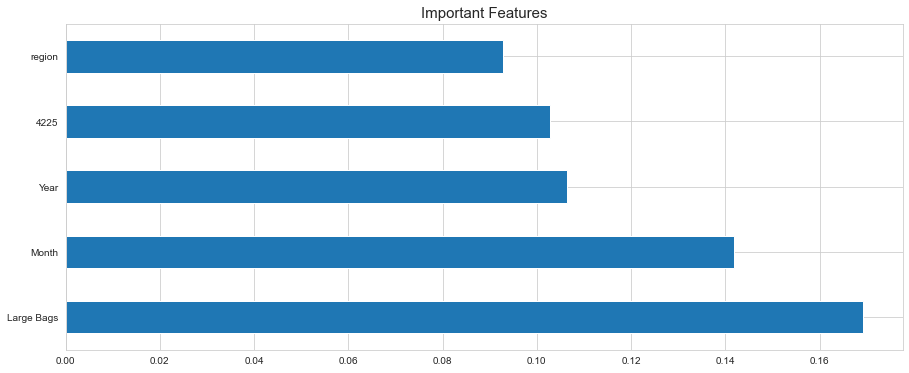

In [47]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

#### we can see that AvocadoLarge Bags is our most important features among all the features

## PCA 

In [48]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=12)

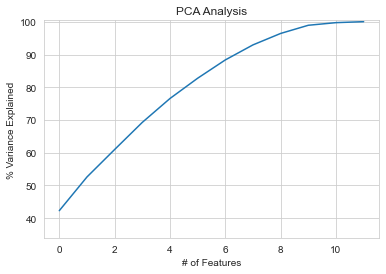

In [49]:
#Calculate Eigenvalues
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)




In [50]:
x.shape

(9552, 12)

In [51]:
pca=PCA(n_components=9)
x=pca.fit_transform(x)
x.shape

(9552, 9)

## Train Test Split:

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 50)
y_train.head()

,AveragePrice
9105,0.96
16838,1.51
17678,1.97
12951,1.33
16337,1.78


## Model Training:

In [53]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [54]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

## LINERAR REGRESSION

max r2 score corresponding to 82 is 35.353473697094316


cross validation score -7.01786973407352


Standard Deviation 52.757924821546055


Training accuracy 31.647310166156362


Test Accuracy 34.958231009975016


MAE 0.22879793961847797


MSE 0.08828808215371535


RMSE 0.29713310511236435




82

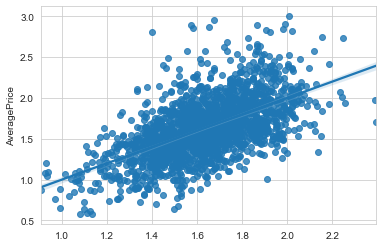

In [55]:
lr=LinearRegression()
maxr2_score(lr,x,y)

## Ridge

max r2 score corresponding to 82 is 35.35315696889505


cross validation score -6.981058185976485


Standard Deviation 52.686191510581324


Training accuracy 31.647308237655245


Test Accuracy 34.958214396084145


MAE 0.22879724949191266


MSE 0.08828810470550916


RMSE 0.2971331430613373




82

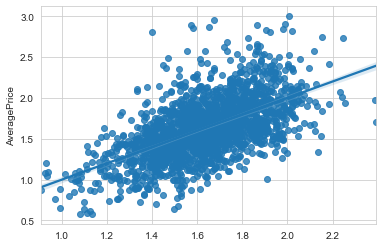

In [56]:
ridge=Ridge()
maxr2_score(ridge,x,y)

## Decision Tree Regressor

max r2 score corresponding to 48 is 48.9140916019566


cross validation score -59.57114193343946


Standard Deviation 28.77617320975393


Training accuracy 100.0


Test Accuracy 43.64466179609856


MAE 0.18838827838827837


MSE 0.0764970695970696


RMSE 0.2765810362209774




48

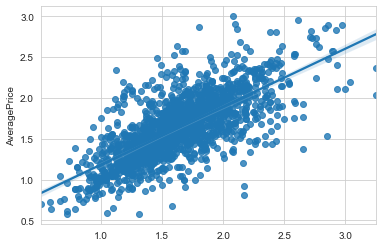

In [57]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

## KNN

max r2 score corresponding to 94 is 72.39572084768776


cross validation score 0.19093388833615776


Standard Deviation 14.836508762870354


Training accuracy 80.99457407801056


Test Accuracy 67.51774865579536


MAE 0.1506415489272632


MSE 0.04409160020931449


RMSE 0.20997999954594365




94

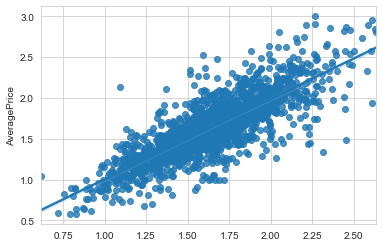

In [58]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

## SVM

max r2 score corresponding to 90 is 68.48246962747963


cross validation score 24.322057418111857


Standard Deviation 18.61702846087442


Training accuracy 70.05599123695009


Test Accuracy 67.02193779209564


MAE 0.15593939507266666


MSE 0.04476461680998135


RMSE 0.21157650344492734




90

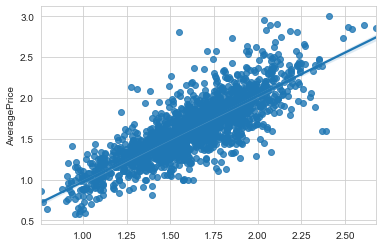

In [59]:
svm = SVR()
maxr2_score(svm,x,y)

## Random Forest

max r2 score corresponding to 48 is 76.1461509977665


cross validation score 16.135148487847754


Standard Deviation 18.53922278920215


Training accuracy 96.31543697475381


Test Accuracy 73.62011567012533


MAE 0.13714971219256936


MSE 0.03580821110936682


RMSE 0.1892305765709306




48

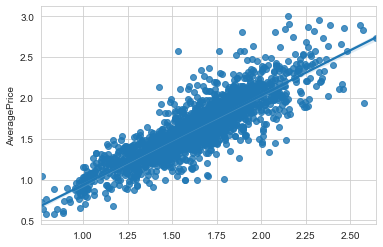

In [60]:
rf = RandomForestRegressor()
maxr2_score(rf,x,y)

####  We can see from above all the Models that the Random forest gives us a Maximun R2 score. Additionally, the training and Testing accuracy is also good as comapired to other models.RMSE error and MAE is also lowest among other models. So we will choose this as our model and do Hyperparameter Tuning for the same.

## Hyper parameter Tuning

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'n_estimators': 200}

 Mean Absolute Error (MAE) : 12.996391941391941
Mean Squared Error (MSE) : 3.2921525019623226
Root Mean Squared Error : 18.14428974074853
R_2 score: 63.834967493072625


<AxesSubplot:ylabel='AveragePrice'>

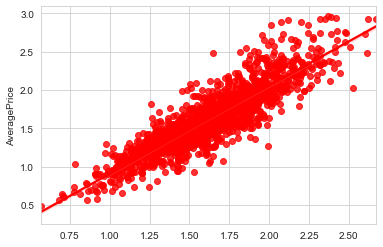

In [62]:
forest=RandomForestRegressor(bootstrap=False,max_depth=50,max_features=3,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

#### In hyper perameter r2 score is 64% which is low, we will save without hyperparameter tuning RF model. 

## Saving Model 

In [66]:
import pickle
filename = 'avacado.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Compare ytest and y predict to check the model performance:

In [74]:
## Will plot and visualize: will make prediction for the x_test data and compare the obtained predict values with the actual y_test values to check our model performance. 
y_pred = rf.predict(x_test)
y_pred
y_test

,AveragePrice
9083,1.33
16778,1.45
9446,1.60
17577,1.66
10909,1.47
...,...
9287,1.54
12750,1.36
12189,1.46
10805,1.95


## we have y_pred values, lets plot with y_test:

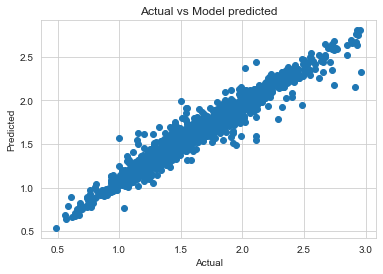

In [71]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Model predicted')
plt.show()

# we can see that the graph is fairly linear. letsanalyze with some samples as actual = 1.0 predicted is also 1.0. Actual = 2.0 predicted is also 2.0. 

### Conclusion:  Our model is working good.

